In [10]:
import math
import meep as mp
from meep import mpb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Maybe consider this example: https://github.com/VincentYves/Photonic_crystals

Specifically the group index calculation here: https://github.com/VincentYves/Photonic_crystals/blob/main/SLW1.py

In [42]:
k_points = [
    mp.Vector3(0.25),             
              mp.Vector3(
                  0.5),      
              ]              
k_points = mp.interpolate(100, k_points)

geometry_lattice = mp.Lattice(size=mp.Vector3(1, 1),
                                 basis1=mp.Vector3(math.sqrt(3) / 2, 0.5),
                                 basis2=mp.Vector3(math.sqrt(3) / 2, -0.5))

# Initialize the holes. 
geometry = [mp.Cylinder(0.4, material=mp.air)]

default_material=mp.Medium(epsilon=10.4329)
resolution = 16
num_bands = 4

ms = mpb.ModeSolver(num_bands=num_bands,
                    k_points=k_points,
                    geometry=geometry,
                    geometry_lattice=geometry_lattice,
                    resolution=resolution,
                    default_material=default_material)

In [43]:
import io
import contextlib

f = io.StringIO()
with contextlib.redirect_stdout(f):
    ms.run_te(mpb.fix_efield_phase)

output = f.getvalue().splitlines()
tefreq_output = [line for line in output if line.startswith("tefreqs")]

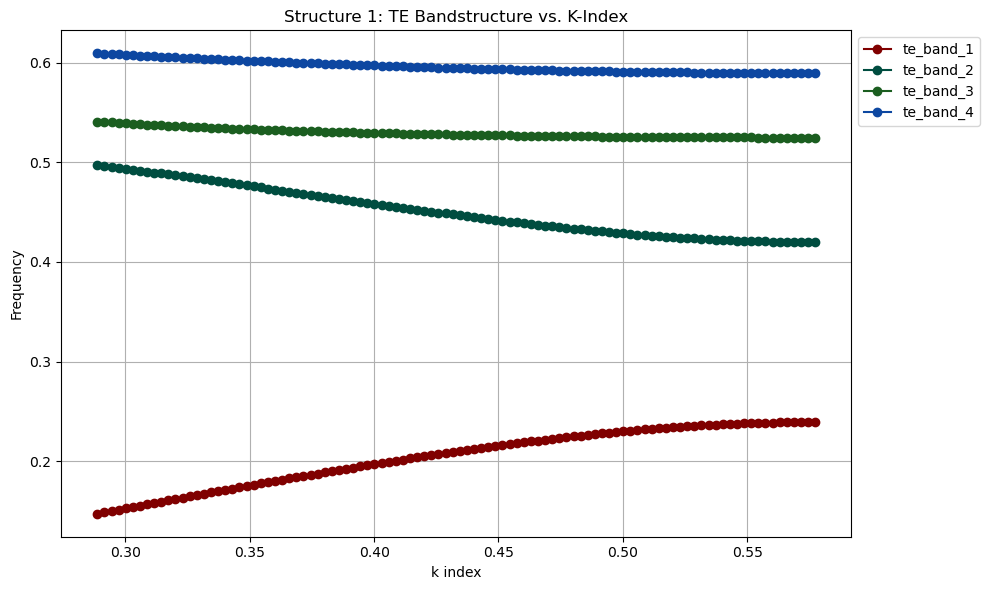

In [44]:
df = pd.read_csv(io.StringIO("\n".join(tefreq_output)))
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

plt.figure(figsize=(10, 6))


te_bands = df.filter(like='te_band')
# Define a list of distinct, high-contrast colors
colors = ['#800000', '#004D40', '#1B5E20', '#0D47A1', '#3E2723', '#BF360C', '#1A237E', '#004D40', '#33691E', '#880E4F', '#263238', '#212121', '#006064', '#827717', '#F57F17', '#3E2723', '#1B5E20', '#0D47A1', '#004D40', '#263238', '#212121', '#424242']

# Ensure there are enough colors for the bands, repeat the color list if necessary
if len(te_bands.columns) > len(colors):
    colors = colors * (len(te_bands.columns) // len(colors) + 1)

k_indices = df['kmag/2pi']
# k_indices = df['k_index']

for i, column in enumerate(te_bands.columns):
    plt.plot(k_indices, te_bands[column], label=column, marker='o', linestyle='-', color=colors[i])

plt.xlabel('k index')
plt.ylabel('Frequency')
plt.title('Structure 1: TE Bandstructure vs. K-Index')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

In [45]:
target_band = 0

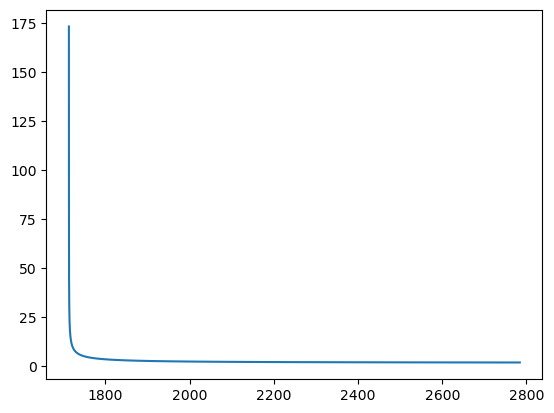

In [46]:
a = 410
kx = [k.x for k in k_points]
omega = ms.all_freqs[:, target_band]
wavelength = a / omega
ng = 1 / np.gradient(omega, kx)

fig, ax = plt.subplots()
ax.plot(wavelength, ng)